## ■ 14장. 서포트 벡터 머신


__svm은 support vector machine의 약자__입니다. 이름에서도 알 수 있듯이 벡터(vector) 개념을 가져와서 사용합니다.  
데이터셋의 여러 속성을 나타내는 데이터프레임의 각열은 열 벡터 형태로 구현됩니다.  
열 벡터들의 각각 고유의 축을 갖는 벡터공간을 만드는데,   
분석 대상이 되는 개별 관측값은 모든 속성(열벡터)이 2개 존재하는 데이터셋은 2차원 평면공간에 좌표로 표시하고,   
속성이 3개이면 3차원 공간에 표시한다.  
4차원 이상의 고차원 벡터 공간의 좌표를 사용하는것도 가능합니다.  

### 훈련 데이터

| x1 | x2 | y |
|:--:|:--:|:-:|
|  2 |  3 | 1 |
|  4 |  5 | 1 |
| -2 | -1 | 0 |
| -1 | -3 | 0 |

학습을 시킨후 불류하는 초평면을 찾는것이다.  
초평면의 수직벡터를 __normal vector__를 찾아서 분류를 해야하는데  
__normal vector__를 찾기 위해서 사용하는 오차함수 수학공식이 아래와 같다.  

적절한 매개변수 C값과 gammma값을 찾는게 중요한데 C가 너무크면 훈련데이터는 잘 분류하지만   
테스터 데이터에 대해서 오버피팅이 발생할 수 있다.
gamma 매개변수는 결정경계의 곡률을 조정하는 매개변수인다.  
gamma 값이 너무 크면 훈련데이터는 잘 분류하지만  
테스트 데이터에 대해서 오버피팅이 발생할 수 있다.

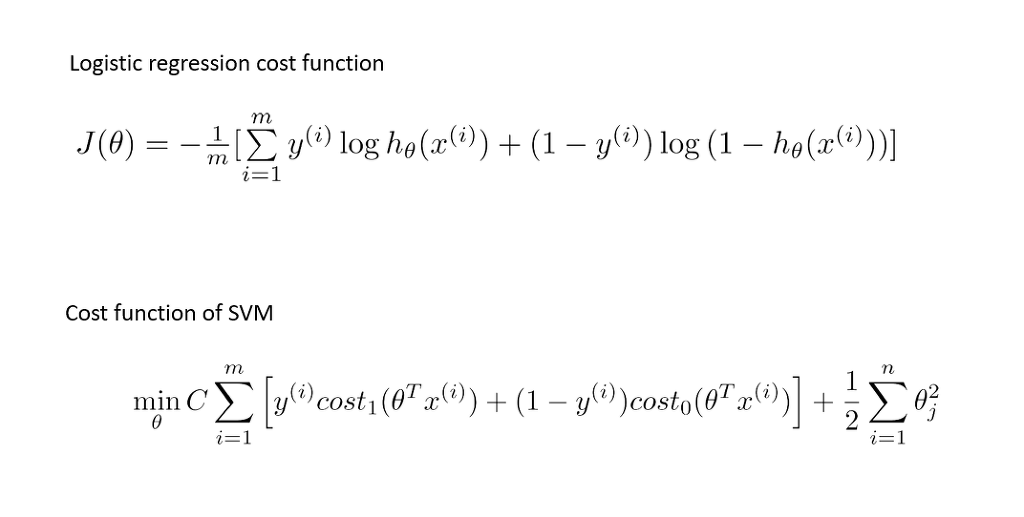

## ■ 서포트 벡터머신을 타이타닉에 적용시켜보기!!

In [18]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)


'''
[Step 2] 데이터 탐색/ 전처리
'''

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
rdf['embarked'].fillna(most_freq, inplace=True)


'''
[Step 3] 분석에 사용할 속성을 선택
'''

# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)


'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')


'''
[Step 5] SVM 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 SVM 분류 모형 가져오기
from sklearn import svm

# 모형 객체 생성 (kernel='rbf' 적용)
svm_model = svm.SVC(kernel='rbf', C = 10, gamma = 0.5)

# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
svm_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(svm_matrix)
print('\n')

# 모형 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)            
print(svm_report)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


[0 1 1 0 0 0 1 0 0 0]
[0 1 1 0 0 0 1 0 0 0]


[[107  15]
 [ 29  64]]


              precision    recall  f1-score   support

           0       0.79      0.88      0.83       122
           1       0.81      0.69      0.74        93

    accuracy                           0.80       215
   macro avg       0.80      0.78      0.79       215
weighted avg       0.80      0.80      0.79       215



## 문제239. 유방암 데이터의 악성종양과 양성종양 분류를 서포트 벡터 머신으로 구현하시오!

In [20]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# Breast Cancer 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)

# 열 이름 지정
df.columns = ['id','clump','cell_size','cell_shape', 'adhesion','epithlial',
              'bare_nuclei','chromatin','normal_nucleoli', 'mitoses', 'class'] 

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)


'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

# bare_nuclei 열의 자료형 변경 (문자열 ->숫자)
print(df['bare_nuclei'].unique())                         # bare_nuclei 열의 고유값 확인
print('\n')

df['bare_nuclei'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['bare_nuclei'] = df['bare_nuclei'].astype('int')       # 문자열을 정수형으로 변환

print(df.describe())                                      # 데이터 통계 요약정보 확인
print('\n')


'''
[Step 3] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=df[['clump','cell_size','cell_shape', 'adhesion','epithlial',
      'bare_nuclei','chromatin','normal_nucleoli', 'mitoses']]  #설명 변수 X
y=df['class']                                                   #예측 변수 Y

# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')


'''
[Step 4] Decision Tree 분류 모형 - sklearn 사용
'''
# sklearn 라이브러리에서 SVM 분류 모형 가져오기
from sklearn import svm

# 모형 객체 생성 (kernel='rbf' 적용)
svm_model = svm.SVC(kernel='rbf', C = 1, gamma = 0.06)

# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
tree_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(tree_matrix)
print('\n')

# 모형 성능 평가 - 평가지표 계산
tree_report = metrics.classification_report(y_test, y_hat)            
print(tree_report)

        id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0  1000025      5          1           1         1          2           1   
1  1002945      5          4           4         5          7          10   
2  1015425      3          1           1         1          2           2   
3  1016277      6          8           8         1          3           4   
4  1017023      4          1           1         3          2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                 699 non-null int64
clump              699 non-null int64
cell_size          699 non-null int64
cell_shape         699 non-n

## 문제240. (케글 타이타닉 데이터) 케글의 타이타닉 머신러닝 모델을 svm을 써서 수행하시오~

## 문제241. 케글 타이타닉 정확도를 올리기 위한 파생변수 생성 방법 2가지를 구현하시오!

1. 결혼한 여자승객이 더 생존율이 높아서 결혼여부에 대한 파생변수를 생성하고 결혼햇으면서 여자인 사람은 1로 하고 아니면 0으로 하는 파생변수를 생성하시오!
2. 배의 객실번호(cabin)에 배 설계도를 보고 값을 채우는 변수 생성